<h3>Importations</h3>

In [1]:
import tensorflow as tf
from tensorflow import keras
from keras import layers
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import image_preprocessing as imgp
from tensorflow.keras.layers.experimental.preprocessing import RandomFlip, RandomRotation

<h3>Reading Data</h3>

In [2]:
TRAIN_SET_DIRECTORY = 'Images/train'
VAL_SET_DIRECTORY = 'Images/val'
SIZE = (160, 160)

train_set = imgp.load_data(TRAIN_SET_DIRECTORY, SIZE, None, shuffle=True, subset=None, seed=1024)
val_set = imgp.load_data(VAL_SET_DIRECTORY, SIZE, None, shuffle=True, subset=None, seed=1024)

Found 296 files belonging to 3 classes.
Found 125 files belonging to 3 classes.


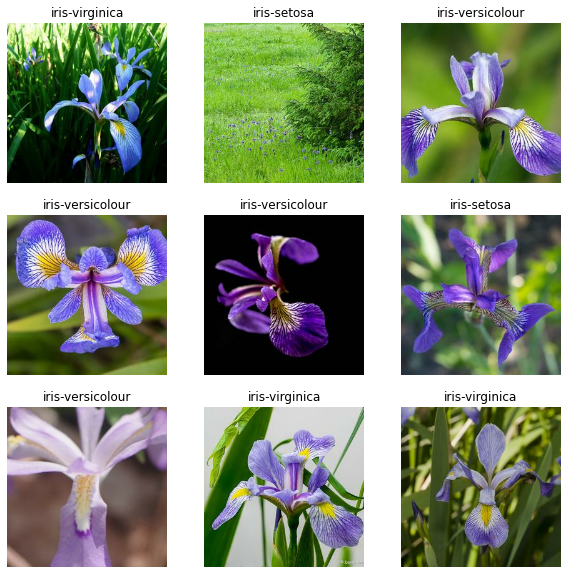

In [3]:
imgp.show_img(dataset=train_set, figsize=(10, 10), nx=3, ny=3)

<h3>Model creation</h3>

In [4]:
def create_model():
    SHAPE = SIZE + (3,)
    input = keras.Input(shape=SHAPE)
    x = imgp.data_augmenter([RandomFlip('horizontal'), RandomRotation(0.2)])(input)
    x = imgp.data_rescaling(1./255)(x)
    x = layers.Conv2D(32, 3, padding='valid', bias_regularizer=keras.regularizers.l2())(x)
    x = layers.MaxPool2D(padding='valid')(x)
    x = layers.Conv2D(64, 5, activation='relu', bias_regularizer=keras.regularizers.l2())(x)
    x = layers.MaxPool2D()(x)
    x = layers.Conv2D(128, 5, activation='relu', bias_regularizer=keras.regularizers.l2())(x)
    x = layers.MaxPool2D()(x)
    x = layers.Flatten()(x)
    x = layers.Dense(128, activation='relu')(x)
    x = layers.Dense(64, activation='relu')(x)
    output = layers.Dense(3, activation='softmax')(x)
    model = keras.Model(inputs=input, outputs = output)
    return model



In [5]:
model = create_model()
model.compile(
    optimizer = keras.optimizers.Adam(),
    loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ["accuracy"]
)


<h3>Model training</h3>

In [6]:
history = model.fit(train_set, epochs=5, validation_data=val_set, batch_size=64)

Epoch 1/5


c:\Users\Billal\AppData\Local\Programs\Python\Python310\lib\site-packages\tensorflow\python\util\dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


10/10 [==============================] - 26s 2s/step - loss: 1.2942 - accuracy: 0.6351 - val_loss: 0.9669 - val_accuracy: 0.6400
Epoch 2/5
10/10 [==============================] - 24s 2s/step - loss: 0.9555 - accuracy: 0.6385 - val_loss: 0.9568 - val_accuracy: 0.6400
Epoch 3/5
10/10 [==============================] - 25s 3s/step - loss: 0.9547 - accuracy: 0.6385 - val_loss: 0.9175 - val_accuracy: 0.6400
Epoch 4/5
10/10 [==============================] - 29s 3s/step - loss: 0.9272 - accuracy: 0.6385 - val_loss: 0.9439 - val_accuracy: 0.6400
Epoch 5/5
10/10 [==============================] - 26s 3s/step - loss: 0.9465 - accuracy: 0.6385 - val_loss: 0.8950 - val_accuracy: 0.6400


<p>I have stopped the raining at epochs = 5, because there is trade off between training accuracy and validation accuracy, if we continue, it's true that we'll have accuracy that approaches to 1, but the validation accuracy still in 0.6 which creates an overfitting problem. Since the human level performance for this problem is 70% approximately, the avoidable bias is not too large (even the human can't distinguish very well between them), so the results are relatively acceptable.</p>

<h3>Debugging</h3>

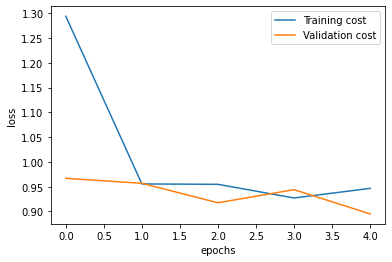

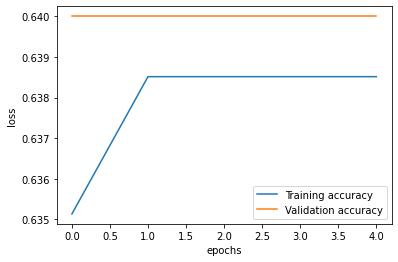

In [17]:
hist = history

plt.figure()
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['Training cost', 'Validation cost'])

plt.figure()
plt.plot(hist['accuracy'])
plt.plot(hist['val_accuracy'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['Training accuracy', 'Validation accuracy'])